In [134]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from numpy import where
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix, precision_recall_curve

# CM1 Software Prediction

In [245]:
data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/data.csv",encoding = "ISO-8859-1")
data["defects"] = data["defects"].astype(int)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [246]:
data.loc[data['defects'] == 1, "Class"] = -1
data.loc[data['defects'] == 0, "Class"] = 1

In [247]:
non_fraud = data[data['Class']==1]
df_train, _ = train_test_split(non_fraud, test_size=0.50, random_state=42)
fraud = data[data['Class']==0]

In [248]:
# training model
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df_train)

In [249]:
y_val = non_fraud['Class']
y_fraud = fraud['Class']
y_testval = pd.concat([y_val, y_fraud])
y_testval = np.array(y_testval)

In [250]:
df_testval = pd.concat([non_fraud,fraud])
y_pred = model.predict(df_testval)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1,  1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1,  1, -1

In [251]:
print(classification_report(y_testval, y_pred,zero_division=1))

              precision    recall  f1-score   support

        -1.0       0.00      1.00      0.00         0
         1.0       1.00      0.37      0.54       449

    accuracy                           0.37       449
   macro avg       0.50      0.69      0.27       449
weighted avg       1.00      0.37      0.54       449



In [252]:
prec, rec, f2, _ = precision_recall_fscore_support(y_testval, y_pred, beta=2, 
                                                   pos_label=1, average='binary',zero_division=1)
print(f'precision is {prec}, recall is {rec} and F2 score is {f2}')

precision is 1.0, recall is 0.37193763919821826 and F2 score is 0.42536933265410093


In [253]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = data.iloc[outlier_index]

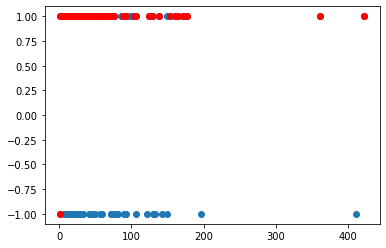

In [254]:
# visualize outputs
plt.scatter(data["loc"], data["Class"])
plt.scatter(outlier_values["loc"], outlier_values["Class"], c = "r")

# KC1 Software Prediction

In [255]:
Kc1data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/kc1Data.csv",encoding = "ISO-8859-1")
Kc1data["defects"] = Kc1data["defects"].astype(int)
Kc1data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,0.31,1187.70,65,10,6,0,18.0,25.0,107.0,64.0,21.0,1
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,0.26,635.37,37,2,5,0,16.0,28.0,89.0,52.0,15.0,1
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,0.08,132.33,21,0,2,0,11.0,10.0,41.0,17.0,5.0,1


In [256]:
Kc1data.loc[Kc1data['defects'] == 1, "Class"] = -1
Kc1data.loc[Kc1data['defects'] == 0, "Class"] = 1

In [257]:
non_fraud = Kc1data[Kc1data['Class']==1]
df_train, _ = train_test_split(non_fraud, test_size=0.50, random_state=42)
fraud = Kc1data[Kc1data['Class']==0]

In [258]:
# training model
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(df_train)

In [259]:
y_val = non_fraud['Class']
y_fraud = fraud['Class']
y_testval = pd.concat([y_val, y_fraud])
y_testval = np.array(y_testval)

In [260]:
df_testval = pd.concat([non_fraud,fraud])
y_pred = model.predict(df_testval)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [261]:
print(classification_report(y_testval, y_pred,zero_division=1))

              precision    recall  f1-score   support

        -1.0       0.00      1.00      0.00         0
         1.0       1.00      0.73      0.84      1783

    accuracy                           0.73      1783
   macro avg       0.50      0.86      0.42      1783
weighted avg       1.00      0.73      0.84      1783



In [262]:
prec, rec, f2, _ = precision_recall_fscore_support(y_testval, y_pred, beta=2, 
                                                   pos_label=1, average='binary',zero_division=1)
print(f'precision is {prec}, recall is {rec} and F2 score is {f2}')

precision is 1.0, recall is 0.7251822770611329 and F2 score is 0.7673590504451038


In [263]:
# filter outlier index
outlier_index = where(y_pred == -1) 
# filter outlier values
outlier_values = Kc1data.iloc[outlier_index]

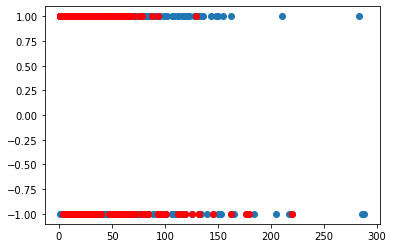

In [264]:
# visualize outputs
plt.scatter(Kc1data["loc"], Kc1data["Class"])
plt.scatter(outlier_values["loc"], outlier_values["Class"], c = "r")